## **EDA Y DATA CLEANING**

In [3]:
#%pip install geopy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim   

In [4]:
df = pd.read_csv('../Data/Idealista_Original.csv')
df.head()

,web_id,url,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,...,terrace,balcony,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update
0,99439319,https://www.idealista.com/en/inmueble/99439319/,"Flat / apartment for rent in pablo luna, 4",Flat,1400,NaN,False,Silcasas Ochocientas,60,NaN,...,True,False,False,False,False,"pablo luna, 4, Subdistrict Castilla, District ...",Chamartín,Castilla,28046.0,7 November
1,99439586,https://www.idealista.com/en/inmueble/99439586/,Penthouse for rent in calle de Bolivia,Penthouse,1300,1.0,False,Cruzity,77,NaN,...,False,False,False,False,False,"Calle de Bolivia, Subdistrict Bernabéu-Hispano...",Chamartín,Bernabéu-Hispanoamérica,28016.0,7 November
2,99439169,https://www.idealista.com/en/inmueble/99439169/,Duplex for rent in calle de la constancia,Duplex,950,1.0,False,Mm Home,72,68.0,...,True,False,False,False,False,"Calle de la constancia, Subdistrict Prosperida...",Chamartín,Prosperidad,28002.0,7 November
3,26925909,https://www.idealista.com/en/inmueble/26925909/,"Flat / apartment for rent in Urb. el viso, El ...",Flat,2975,1.0,False,B&H Partners,160,NaN,...,True,False,False,True,False,"Urb. el viso, Subdistrict El Viso, District Ch...",Chamartín,El Viso,NaN,7 November
4,99440018,https://www.idealista.com/en/inmueble/99440018/,Studio flat for rent in luis cabrera,Studio,650,1.0,False,Madrid en Propiedad,30,NaN,...,False,True,False,False,False,"luis cabrera, Subdistrict Prosperidad, Distric...",Chamartín,Prosperidad,28002.0,7 November


In [3]:
df.columns

Index(['web_id', 'url', 'title', 'type', 'price', 'deposit', 'private_owner',
       'professional_name', 'floor_built', 'floor_area', 'floor', 'year_built',
       'orientation', 'bedrooms', 'bathrooms', 'second_hand', 'lift',
       'garage_included', 'furnished', 'equipped_kitchen', 'fitted_wardrobes',
       'air_conditioning', 'terrace', 'balcony', 'storeroom', 'swimming_pool',
       'garden_area', 'location', 'district', 'subdistrict', 'postalcode',
       'last_update'],
      dtype='object')

La información de las columnas del dataset que vamos a utilizar se detalla a continuación:

- `web_id`: idealista id
- `url`: idealista link
- `title`: english title
- `type`: property type
- `price`: price to rent the property
- `deposit`: deposit needed to rent
- `private_owner`: if the property owner is private or not
- `professional_name`: agency name, null => private owner
- `floor_built`: built area in square meters
- `floor_area`: living area in square meters
- `floor`: floor number
- `year_built`: year of the building
- `orientation`: orientation of the property
- `bedrooms`: number of bedrooms
- `bathrooms`: number of bathrooms
- `second_hand`: if the property is not new or not
- `lift`: if the property has lift or not
- `garage_included`: if the property has garage or not
- `furnished`: if the property is furnished or not
- `equipped_kitchen`: if the property has equipped kitchen or not
- `fitted_wardrobes`: if the property has fitted wardrobes or not
- `air_conditioning`: if the property has air conditioning or not
- `terrace`: if the property has terrace or not
- `balcony`: if the property has balcony or not
- `storeroom`: if the property has storeroom or not
- `swimming_pool`: if the property has swimming pool or not
- `garden_area`: if the property has a garden area or not
- `location`: property address
- `district`: property district from idealista
- `subdistrict`: property subdistrict from idealista
- `postalcode`: property postal code
- `last update`: last update date from idealista

Hay varias columnas que son completamente imprescindibles para nuestro análisis: web_id, url, title y proffesional_name, vamos a proceder a borrarlas. 

In [4]:
df.drop(columns=['web_id', 'url', 'title', 'professional_name'], inplace= True)

In [5]:
df.shape

(9229, 28)

In [6]:
df.info() #para ver el tipo de datos, los datos nulos, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              9229 non-null   object 
 1   price             9229 non-null   int64  
 2   deposit           5407 non-null   float64
 3   private_owner     9229 non-null   bool   
 4   floor_built       9229 non-null   int64  
 5   floor_area        3938 non-null   float64
 6   floor             8908 non-null   object 
 7   year_built        2893 non-null   float64
 8   orientation       4411 non-null   object 
 9   bedrooms          9229 non-null   int64  
 10  bathrooms         9229 non-null   int64  
 11  second_hand       9229 non-null   bool   
 12  lift              9229 non-null   bool   
 13  garage_included   9229 non-null   bool   
 14  furnished         9229 non-null   bool   
 15  equipped_kitchen  9229 non-null   bool   
 16  fitted_wardrobes  9229 non-null   bool   


In [7]:
#Vemos si hay registros duplicados
df.duplicated().value_counts()

False    9196
True       33
dtype: int64

In [8]:
#Borramos los registros duplicados
df.drop_duplicates(inplace= True)
df.reset_index(drop= True, inplace= True)

## COLUMNAS CATEGÓRICAS

Vamos a echar un vistazo a las columnas categóricas, para ver cuantos valores únicos hay en cada una de ellas y la frecuencia de estos. 

In [9]:
def categoricas (columna):
    print(df[columna].value_counts(dropna= False))
    df[columna].value_counts().plot(kind='pie', title='Frecuencia de valores en ' + str(columna))
    plt.show()

Flat             7335
Penthouse         617
Studio            444
Duplex            335
Detached          203
Terraced          159
Semi-detached      91
House               9
Estate              2
Village             1
Name: type, dtype: int64


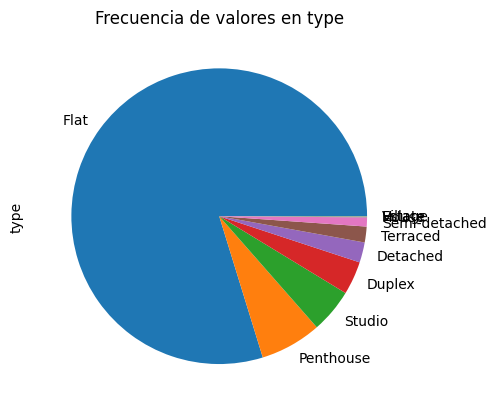

In [10]:
categoricas('type')

Centro                          1298
Barrio de Salamanca             1108
Chamberí                         766
Chamartín                        740
Tetuán                           585
                                ... 
Parque Roma - Coronas              1
Las Zorreras - Monte Encinar       1
Los Ángeles - Jarandilla           1
Centro Comercial - Hospital        1
Zona Iglesia - Estación            1
Name: district, Length: 121, dtype: int64


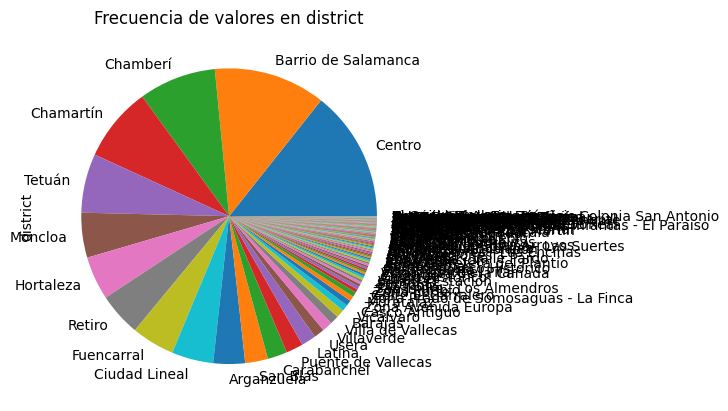

In [11]:
categoricas ('district')

NaN                                            770
Lavapiés-Embajadores                           301
Recoletos                                      279
Chueca-Justicia                                253
Malasaña-Universidad                           249
                                              ... 
El Peñalar - Arroyo de Trofas - Montealegre      1
El Monte                                         1
Atalaya                                          1
Zona Auditorio                                   1
Monteclaro                                       1
Name: subdistrict, Length: 166, dtype: int64


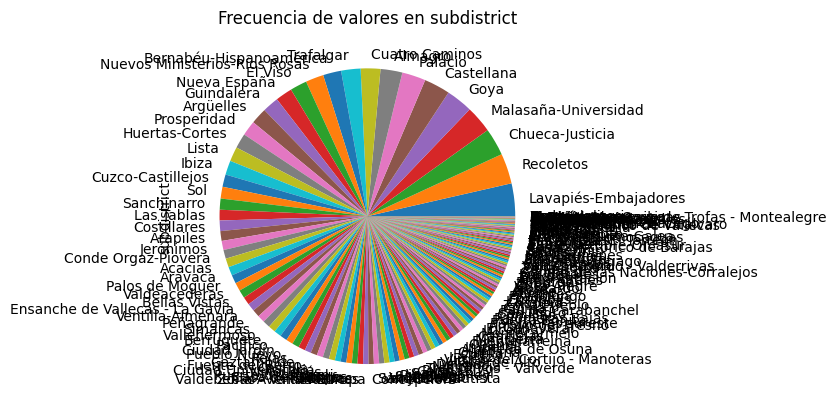

In [12]:
categoricas ('subdistrict')

NaN      4801
east     1415
west     1352
south    1255
north     373
Name: orientation, dtype: int64


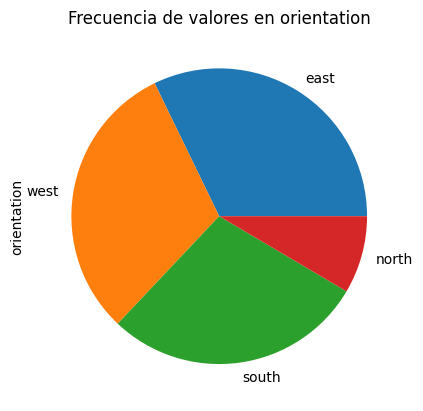

In [13]:
categoricas ('orientation')

1st       1635
2nd       1427
3rd       1369
4th       1134
ground     874
          ... 
290          1
175          1
57           1
309          1
138          1
Name: floor, Length: 199, dtype: int64


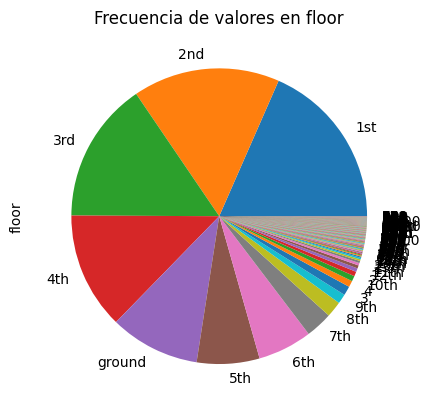

In [14]:
categoricas ('floor')

7 November     1014
4 November      953
3 November      938
6 November      793
2 November      633
               ... 
19 December       1
7 June            1
20 May            1
28 April          1
27 June           1
Name: last_update, Length: 236, dtype: int64


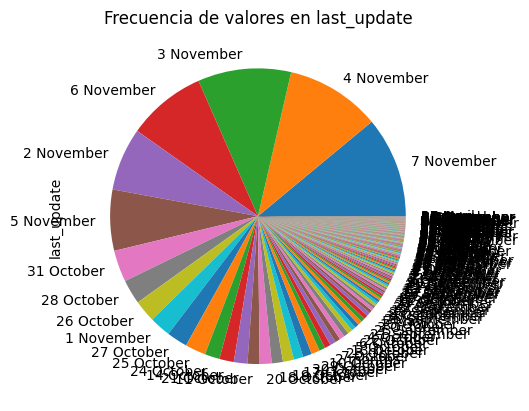

In [15]:
categoricas('last_update')

### **Modificaciones y limpieza de datos**: 

Como se puede ver en distritos, el dataset contiene datos de Madrid Provincia, no de Madrid municipio. El estudio que queremos realizar para la predicción de precios lo queremos centrar dentro del Municipio de Madrid, por lo que vamos a limpiar aquellos registros que no pertenezcan a esta zona. Madrid Municipio se compone de 21 distritos:
1. Centro
2. Arganzuela
3. Retiro
4. Salamanca
5. Chamartín
6. Tetuán
7. Chamberí
8. Fuencarral-El Pardo
9. Moncloa
10. Latina
11. Carabanchel
12. Usera
13. Puente de Vallecas
14. Moratalaz
15. Ciudad Lineal
16. Hortaleza
17. Villaverde
18. Villa de Vallecas
19. Vicálvaro
20. San Blas
21. Barajas

(Fuente: Ayuntamiento de Madrid)

Si el distrito es distinto a alguno de esta lista, procederemos a eliminar el registro. Para ello, vamos a buscar los 21 distritos para ver como están nombrados en nuestro dataset y seleccionaremos solo aquellas filas cuyo valor en district corresponda con estos distritos. Por lógica, serán los distritos donde hay un mayor número de registros, por lo que vamos a hacer un value_counts() y ordenarlo de mayor a menor para facilitar el trabajo. 

In [16]:
freq_district = df['district'].value_counts()

df_district = pd.DataFrame({'distritos': freq_district.index, 'frecuencia': freq_district.values}).sort_values(by='frecuencia', ascending=False)

df_district.head(40)

,distritos,frecuencia
0,Centro,1298
1,Barrio de Salamanca,1108
2,Chamberí,766
3,Chamartín,740
4,Tetuán,585
5,Moncloa,445
6,Hortaleza,431
7,Retiro,428
8,Fuencarral,427
9,Ciudad Lineal,413


In [17]:
distritos = [ df_district['distritos'][i]for i in range(23) if (df_district['distritos'][i] != 'Casco Antiguo') \
             & (df_district['distritos'][i] != 'Zona Avenida Europa')]

print(len(distritos))
distritos

#estos son los 21 distritos con los que nos vamos a quedar del df

21


['Centro',
 'Barrio de Salamanca',
 'Chamberí',
 'Chamartín',
 'Tetuán',
 'Moncloa',
 'Hortaleza',
 'Retiro',
 'Fuencarral',
 'Ciudad Lineal',
 'Arganzuela',
 'San Blas',
 'Carabanchel',
 'Puente de Vallecas',
 'Latina',
 'Usera',
 'Villaverde',
 'Villa de Vallecas',
 'Barajas',
 'Vicálvaro',
 'Moratalaz']

In [18]:
df = df[df['district'].isin(distritos)]

Aún así, el distrito centro puede contener datos confusos, vamos a echar un ojo. 

In [19]:
df[df['district'] == 'Centro'][['subdistrict']].value_counts(dropna= False)

subdistrict         
Lavapiés-Embajadores    301
Chueca-Justicia         253
Malasaña-Universidad    249
Palacio                 218
Huertas-Cortes          137
Sol                     108
NaN                      32
dtype: int64

A priori la gran mayoria de los subdistritos concuerdan con el distrito centro de Madrid Municipio, vamos a echar un ojo a los 30 valores nulos gracias a la columna location.

In [20]:
pd.set_option('display.max_colwidth', None)
df.loc[df['subdistrict'].isna(), ['subdistrict', 'location']]

,subdistrict,location
2799,NaN,", District Centro, Villaviciosa de Odón, Zona noroeste, Madrid"
2842,NaN,"San Vicente de Paul, District Centro, Villanueva del Pardillo, Zona noroeste, Madrid"
2847,NaN,", District Centro, Villaviciosa de Odón, Zona noroeste, Madrid"
2852,NaN,", District Centro, Villanueva del Pardillo, Zona noroeste, Madrid"
2869,NaN,"Calle Lapislázuli, 5, District Centro, Villanueva del Pardillo, Zona noroeste, Madrid"
2882,NaN,"Calle de Rascafria, District Centro, Villaviciosa de Odón, Zona noroeste, Madrid"
2911,NaN,"Azucena, District Centro, Villaviciosa de Odón, Zona noroeste, Madrid"
2946,NaN,"SAN SEBASTIAN, District Centro, El Escorial, Zona noroeste, Madrid"
2981,NaN,"Avenida Odón, District Centro, Villaviciosa de Odón, Zona noroeste, Madrid"
3005,NaN,"Calle Fernando III, Urb. Centro, District Centro, Villaviciosa de Odón, Zona noroeste, Madrid"


Se puede observar que el distrito Centro en estas filas no corresponde con el Centro de Madrid Capital, si no con municipios. Borramos estas filas para evitar ruido. 

In [21]:
df = df[~((df['district'] == 'Centro') & (df['subdistrict'].isna()))]
df.reset_index(drop=True, inplace=True)

La columna de location priori no parece que aporte mucha información porque ya tenemos datos del distrito y subdistrito, no obstante, vamos a generar columnas nuevas: `codigo postal` (nos servirá para completar nulos de la que ya tenemos), `nombre de la calle`, `longitud` y `latitud`. Después podremos eliminar sin problemas la columna de location, pues tendremos toda la información relevante disponible en nuestro df. 

Para llevar a cabo esto, contaremos con la ayuda de la librería geopy. 

In [22]:
df['location'].sample(30)

3786                                              Calle de Irún, 11, Subdistrict Argüelles, District Moncloa, Madrid, Madrid city, Madrid
3544                                     Calle de San Narciso, 19, Subdistrict Canillejas, District San Blas, Madrid, Madrid city, Madrid
6158                                                  , Subdistrict Guindalera, District Barrio de Salamanca, Madrid, Madrid city, Madrid
2004                                                    Miguel Angel, Subdistrict Almagro, District Chamberí, Madrid, Madrid city, Madrid
3074                                   Calle del Aviador Zorita, Subdistrict Cuatro Caminos, District Tetuán, Madrid, Madrid city, Madrid
7909                                 Calle de la Ballesta, Subdistrict Malasaña-Universidad, District Centro, Madrid, Madrid city, Madrid
7199                                 Santa Isabel, 21 -23, Subdistrict Lavapiés-Embajadores, District Centro, Madrid, Madrid city, Madrid
6788                              

In [23]:
#Hacemos algunos cambios para que la librería reconozca de la mejor manera posible las localizaciones

df['location'] = df['location'].str.replace('Madrid city, Madrid', 'España')
df['location'] = df['location'].str.replace('Subdistrict ', '')
df['location'] = df['location'].str.replace('District ', '')

In [28]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="location_app")

def get_location(x):
    location = geolocator.geocode(x, timeout=7)
    try:
        postal_code = location.address.split(',')[-2].lstrip()
        street_name = location.address.split(',')[0].lstrip()
        latitude = location.latitude
        longitude = location.longitude

        return pd.Series([postal_code, street_name, latitude, longitude])
        
    except:
        return pd.Series([None,None,None,None])

df[['PostalCode2', 'Street', 'latitude', 'longitude']] = df['location'].apply(get_location)

Ahora podemos borrar la columna location

In [29]:
df.drop(columns = 'location', inplace = True)

Vamos a rellenar los códigos postales que no se han podido obtener con Geopy con los que venían en el df cuando sea posible.



In [30]:
df['postalcode'] = df['postalcode'].astype(str)
df['PostalCode2'] = df['PostalCode2'].astype(str)

In [31]:
df['postalcode'].unique()

array(['28046.0', '28016.0', '28002.0', 'nan', '28036.0', '28006.0',
       '28020.0', '28034.0', '28050.0', '28029.0', '28035.0', '28049.0',
       '28048.0', '28040.0', '28008.0', '28010.0', '28009.0', '28007.0',
       '28014.0', '28003.0', '28015.0', '28004.0', '28051.0', '28031.0',
       '28045.0', '28005.0', '28012.0', '28039.0', '28001.0', '28022.0',
       '28037.0', '28032.0', '28027.0', '28023.0', '28071.0', '28026.0',
       '28041.0', '28043.0', '28017.0', '28033.0', '28024.0', '28011.0',
       '28047.0', '28044.0', '28054.0', '28052.0', '28019.0', '28025.0',
       '28028.0', '28018.0', '28053.0', '28038.0', '28030.0', '28021.0',
       '28055.0', '28042.0', '28013.0'], dtype=object)

In [32]:
for i in range(len(df)):

    if df.loc[i,'postalcode'] == '<NA>':
        df.loc[i, 'postalcode'] = df.loc[i, 'PostalCode2']



In [33]:
df['postalcode'].unique()

array(['28046.0', '28016.0', '28002.0', 'nan', '28036.0', '28006.0',
       '28020.0', '28034.0', '28050.0', '28029.0', '28035.0', '28049.0',
       '28048.0', '28040.0', '28008.0', '28010.0', '28009.0', '28007.0',
       '28014.0', '28003.0', '28015.0', '28004.0', '28051.0', '28031.0',
       '28045.0', '28005.0', '28012.0', '28039.0', '28001.0', '28022.0',
       '28037.0', '28032.0', '28027.0', '28023.0', '28071.0', '28026.0',
       '28041.0', '28043.0', '28017.0', '28033.0', '28024.0', '28011.0',
       '28047.0', '28044.0', '28054.0', '28052.0', '28019.0', '28025.0',
       '28028.0', '28018.0', '28053.0', '28038.0', '28030.0', '28021.0',
       '28055.0', '28042.0', '28013.0'], dtype=object)

Y borramos la columna PostalCode2

In [34]:
df.drop(columns=['PostalCode2'], inplace= True)

Antes de seguir, vamos a guardar el df hasta ahora, debido al tiempo que tarda en ejecutarse el código de la API de Geopy

In [ ]:
df.to_csv('../Data/DataFrame provisional.csv')

----

Lo cargamos de nuevo

In [3]:
df = pd.read_csv('../Data/DataFrame provisional.csv', index_col=0)

La columna de floor tenía algunos valores raros, vamos a echar un vistazo más a fondo

In [4]:
df['floor'].unique()

array(['3rd', '6th', '4th', 'ground', '1st', '141', '5th', '82', '252',
       '120', '2nd', '9th', '8th', '10th', '55', '45', '215', '2', '7th',
       '1', '130', '20th', nan, '80', '11th', '353', '3', '4', '13th',
       '70', '220', '300', '19th', '185', '12th', '17th', '88', '97',
       '225', '60', '50', '56', '14th', '152', '170', '380', '650', '132',
       '16th', '62', '244', '15th', '38', '147', '500', '59', '175', '65',
       '58', '75', '57', '101', '250', '77', '336', '405', '54', '140',
       '85', '40', '179', '204', '191', '187', '118', '105', '84', '172',
       '68', 'floor', '127', '95', '35', '42', '18th', '53', '39', '30',
       '160', '102', '23rd', '21st', '83', '322', '110', '180', '400',
       '74', '30th', '1,000', '1,190', '26th', '27th', '600', '700',
       '295', '332', '168', '22nd', '154', '270', '86', '100', '260',
       '63', '240', '76', '60th', '280', '139', '111', '197', '272',
       '145', '98', '131', '137', '114', '360', '352', '350', '34

Para luego pasarlo a números, vamos a quitar el st, rd, nd y th, y vamos a cambiar ground por el valor 0:

In [5]:
df['floor'] = df['floor'].str.replace('ground', '0')
df['floor'] = df['floor'].str.replace('st', '')
df['floor'] = df['floor'].str.replace('rd', '')
df['floor'] = df['floor'].str.replace('nd', '')
df['floor'] = df['floor'].str.replace('th', '')
df['floor'] = df['floor'].str.replace('floor', 'nan')
df['floor'] = df['floor'].str.replace(',', '.')

In [6]:
freq_floor = df['floor'].value_counts()

df_floor = pd.DataFrame({'floor': freq_floor.index, 'frecuencia': freq_floor.values}).sort_values(by='frecuencia', ascending=False)

df_floor.head(55)

,floor,frecuencia
0,1,1418
1,3,1295
2,2,1276
3,4,1122
4,0,726
5,5,594
6,6,513
7,7,256
8,8,154
9,9,93


In [7]:
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')

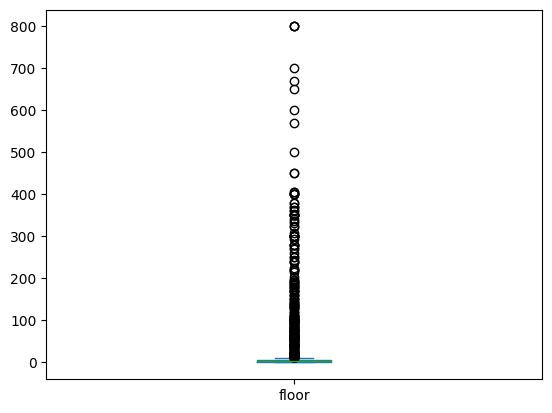

In [8]:
df['floor'].plot.box();


Vemos varios valores que no tienen sentido, no hay pisos en Madrid de 380 plantas. Tras una búesqueda de información, aunque sí que hay edificios residenciales que llegan a las 25 plantas en Madrid (poco común), no hay edificios residenciales que las superen, a excepción de un edificio: la Torre de Madrid, que llega  alas 36 plantas. Vamos a analizar el problema de los datos. 

In [9]:
df[df['floor'] > 25]

,type,price,deposit,private_owner,floor_built,floor_area,floor,year_built,orientation,bedrooms,...,storeroom,swimming_pool,garden_area,district,subdistrict,postalcode,last_update,Street,latitude,longitude
8,Terraced,3895,NaN,False,141,140.0,141.0,NaN,NaN,4,...,False,False,False,Chamartín,Nueva España,28016.0,7 November,Calle de la Madre de Dios,40.463481,-3.673894
20,Flat,1050,NaN,False,82,75.0,82.0,1940.0,west,3,...,True,True,False,Chamartín,Prosperidad,NaN,5 November,Calle de Cartagena,40.439575,-3.673701
22,Duplex,3500,1.0,False,252,210.0,252.0,1968.0,south,3,...,False,False,False,Chamartín,Bernabéu-Hispanoamérica,28036.0,4 November,Estadio Santiago Bernabéu,40.453023,-3.687406
28,Semi-detached,1750,1.0,True,120,100.0,120.0,NaN,north,2,...,True,False,False,Chamartín,Ciudad Jardín,28002.0,3 November,Calle Pinarillo,40.450184,-3.671848
62,Flat,1300,NaN,False,55,45.0,55.0,1990.0,south,1,...,False,False,False,Chamartín,Nueva España,28016.0,5 November,41,40.458898,-3.680805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8024,Flat,1200,1.0,False,50,48.0,50.0,NaN,NaN,1,...,True,False,False,Centro,Malasaña-Universidad,NaN,4 November,Calle del Espíritu Santo,40.425573,-3.705039
8038,Flat,1100,2.0,False,49,41.0,49.0,1900.0,NaN,1,...,True,False,False,Centro,Lavapiés-Embajadores,28012.0,5 November,Calle del Amparo,40.405763,-3.700070
8081,Terraced,2500,1.0,False,190,170.0,190.0,1980.0,NaN,3,...,False,False,False,Barajas,Alameda de Osuna,28042.0,5 November,Alameda de Osuna,40.457581,-3.587975
8098,Terraced,2500,1.0,False,160,150.0,160.0,1980.0,west,3,...,True,False,False,Barajas,Alameda de Osuna,28042.0,6 November,Alameda de Osuna,40.457581,-3.587975


Se puede apreciar que el problema reside en que en ocasiones, en la columna de floor, en vez de colocar el valor correspondiente a la planta del piso, han colocado el área construida en m2.

In [10]:
df[df['Street'].str.contains('Torre de Madrid') & df['Street'].notna()]


,type,price,deposit,private_owner,floor_built,floor_area,floor,year_built,orientation,bedrooms,...,storeroom,swimming_pool,garden_area,district,subdistrict,postalcode,last_update,Street,latitude,longitude
3647,Flat,2300,1.0,False,75,70.0,13.0,NaN,north,1,...,True,False,False,Moncloa,Argüelles,28008.0,7 October,Barceló Torre de Madrid,40.424191,-3.712333
3658,Flat,3100,1.0,False,120,NaN,30.0,NaN,NaN,2,...,False,False,False,Moncloa,Argüelles,28008.0,4 November,Barceló Torre de Madrid,40.424191,-3.712333
3698,Flat,2430,NaN,False,65,NaN,30.0,NaN,NaN,1,...,False,False,False,Moncloa,Argüelles,28008.0,21 September,Barceló Torre de Madrid,40.424191,-3.712333
3699,Flat,2700,NaN,False,70,NaN,13.0,NaN,NaN,1,...,False,False,False,Moncloa,Argüelles,28008.0,23 September,Barceló Torre de Madrid,40.424191,-3.712333
3702,Flat,2970,NaN,False,88,NaN,20.0,NaN,NaN,2,...,False,False,False,Moncloa,Argüelles,28008.0,21 September,Barceló Torre de Madrid,40.424191,-3.712333
3703,Flat,3600,NaN,False,130,NaN,10.0,NaN,NaN,2,...,False,False,False,Moncloa,Argüelles,28008.0,12 July,Barceló Torre de Madrid,40.424191,-3.712333
3704,Flat,3510,NaN,False,120,NaN,14.0,NaN,NaN,2,...,False,False,False,Moncloa,Argüelles,28008.0,8 June,Barceló Torre de Madrid,40.424191,-3.712333
3705,Flat,3780,NaN,False,110,NaN,11.0,NaN,NaN,2,...,False,False,False,Moncloa,Argüelles,28008.0,23 September,Barceló Torre de Madrid,40.424191,-3.712333
3706,Flat,3105,NaN,False,106,NaN,14.0,NaN,NaN,2,...,False,False,False,Moncloa,Argüelles,28008.0,8 June,Barceló Torre de Madrid,40.424191,-3.712333
3712,Flat,2700,NaN,False,70,NaN,13.0,NaN,NaN,1,...,False,True,False,Moncloa,Argüelles,28008.0,24 June,Barceló Torre de Madrid,40.424191,-3.712333


Se ve que, efectivamente, en la Torre de Madrid, hay viviendas en plantas muy elevadas. Vamos a cambiar los valores que superan los 25 por nan, pues es evidente que los datos son erróneos, a excepcion de aquellos donde la residencia se encuentra en la Torre de Madrid.

In [11]:
df['floor'] = df['floor'].where((df['floor'] <= 25) | (df['Street'].str.contains('Torre de Madrid')), np.nan)


----

La columna last update siempre es acerca del año 2022. Vamos a quedarnos con el mes. 

In [12]:
df['last_update'].unique()

array(['7 November', '4 November', '5 November', '6 November',
       '3 November', '2 November', '31 October', '1 November',
       '28 October', '26 October', '27 October', '24 October',
       '25 October', '19 October', '18 October', '22 October',
       '14 October', '13 October', '20 October', '11 October',
       '10 October', '21 October', '5 October', '12 October', '6 October',
       '1 October', '4 October', '2 October', '15 October',
       '27 September', '21 September', '9 September', '7 October',
       '30 September', '3 October', '19 September', '28 September',
       '5 September', '29 August', '17 August', '26 August', '7 August',
       '2 months', '9 June', '4 May', '24 August', '23 June',
       '30 October', '26 May', '19 May', '21 February', '1 February',
       '9 August', '10 March', '19 August', '21 January', '5 May',
       '13 September', '24 April', '24 May', '26 March', '31 August',
       '7 September', '11 January', '23 October', '26 September',
       

In [13]:
df['last_update'] = pd.to_datetime(df['last_update'], format = '%d %B', errors = 'coerce')

In [14]:
df['last_update'] = df['last_update'].dt.strftime('%B')

In [15]:
df['last_update'].value_counts(dropna= False)

November     4605
October      2551
September     420
August         92
May            89
June           80
January        63
July           56
NaN            53
February       53
December       32
March          26
April          24
Name: last_update, dtype: int64

----

## COLUMNAS NUMÉRICAS

In [16]:
df.describe()

,price,deposit,floor_built,floor_area,floor,year_built,bedrooms,bathrooms,postalcode,latitude,longitude
count,8144.000000,4766.000000,8144.00000,3464.000000,7672.000000,2480.000000,8144.000000,8144.000000,5935.000000,5345.000000,5345.000000
mean,1967.619597,1.455728,104.71169,90.436201,3.298382,1971.820565,2.182834,1.737107,28022.114406,40.432697,-3.689005
std,1554.661460,0.612250,77.41787,65.268613,2.827948,35.847798,1.288666,1.023976,15.870406,0.030070,0.033214
min,450.000000,1.000000,0.00000,0.000000,0.000000,1800.000000,0.000000,1.000000,28001.000000,40.336404,-3.828858
25%,1050.000000,1.000000,60.00000,51.000000,1.000000,1956.000000,1.000000,1.000000,28008.000000,40.412592,-3.707552
50%,1450.000000,1.000000,82.00000,73.000000,3.000000,1973.000000,2.000000,1.000000,28020.000000,40.430759,-3.695685
75%,2400.000000,2.000000,123.00000,105.000000,4.000000,2001.000000,3.000000,2.000000,28036.000000,40.450678,-3.670580
max,25000.000000,6.000000,990.00000,995.000000,30.000000,2022.000000,25.000000,20.000000,28071.000000,40.531583,-3.546616


--

Hay varias columnas numéricas con demasiados datos nulos, por encima del 40%, vamos a proceder a borrarlas

In [17]:
precent_missing = df.isnull().sum()*100/len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                'percent_missing': precent_missing}).sort_values('percent_missing', ascending=False)
missing_value_df

,column_name,percent_missing
year_built,year_built,69.548134
floor_area,floor_area,57.465619
orientation,orientation,52.811886
deposit,deposit,41.478389
longitude,longitude,34.368861
Street,Street,34.368861
latitude,latitude,34.368861
postalcode,postalcode,27.124263
floor,floor,5.795678
last_update,last_update,0.650786


Primero se comprueba que no tengan una relación alta con la columna que queremos predecir.

In [18]:
np.abs(df.corr()['price'].sort_values(ascending = False))

price               1.000000
floor_area          0.742630
floor_built         0.740142
bathrooms           0.693113
bedrooms            0.513976
air_conditioning    0.210448
balcony             0.167706
fitted_wardrobes    0.140101
garage_included     0.140010
latitude            0.121407
storeroom           0.119243
terrace             0.111590
floor               0.100172
swimming_pool       0.054568
deposit             0.037196
year_built          0.035712
second_hand         0.017187
furnished           0.003216
equipped_kitchen    0.003216
longitude           0.087838
private_owner       0.162799
postalcode          0.197981
lift                0.266451
garden_area              NaN
Name: price, dtype: float64

In [19]:
np.abs(df.corr()['floor_area'].sort_values(ascending = False))

floor_area          1.000000
floor_built         0.913566
bathrooms           0.765969
price               0.742630
bedrooms            0.735696
garage_included     0.296482
terrace             0.247286
storeroom           0.246714
latitude            0.205434
fitted_wardrobes    0.195071
swimming_pool       0.182579
balcony             0.168729
air_conditioning    0.157086
floor               0.115152
postalcode          0.078328
longitude           0.067118
year_built          0.048508
second_hand         0.033314
deposit             0.011507
equipped_kitchen    0.010331
furnished           0.010331
private_owner       0.139142
lift                0.446339
garden_area              NaN
Name: floor_area, dtype: float64

En el caso de floor_area, aunque la correlación sea muy alta, la columna de floor_built tiene prácticamente la misma correlación, y además están muy altamente correlacionadas entre sí, por lo que no nos hará daño eliminarla. 

In [20]:
cols_to_drop = missing_value_df[missing_value_df['percent_missing'] > 40].index.values
df.drop(columns=cols_to_drop, inplace=True)

En el describe() se ve que floor built tiene como míninimo 0, esto no tiene ningún sentido, vamos a echar un vistazo:

In [21]:
df[df['floor_built'] <20]

,type,price,private_owner,floor_built,floor,bedrooms,bathrooms,second_hand,lift,garage_included,...,storeroom,swimming_pool,garden_area,district,subdistrict,postalcode,last_update,Street,latitude,longitude
1545,Studio,700,False,12,3.0,0,1,True,True,False,...,False,False,False,Retiro,Jerónimos,28014.0,November,Paseo de la Reina Cristina,40.407431,-3.679784
3675,Detached,6000,False,0,1.0,6,5,True,False,True,...,True,True,False,Moncloa,El Plantío,28023.0,September,NaN,NaN,NaN
6425,Detached,9000,False,0,3.0,7,6,True,False,True,...,True,False,False,Hortaleza,Conde Orgaz-Piovera,28043.0,October,NaN,NaN,NaN
6527,Detached,9000,False,0,1.0,7,6,True,False,True,...,True,True,False,Hortaleza,Conde Orgaz-Piovera,28043.0,November,NaN,NaN,NaN
6605,Detached,10000,False,0,2.0,15,6,True,False,True,...,True,False,False,Hortaleza,Conde Orgaz-Piovera,28043.0,October,NaN,NaN,NaN
6640,Terraced,6000,False,0,NaN,7,6,True,False,True,...,False,False,False,Hortaleza,Conde Orgaz-Piovera,28043.0,October,Colegio Parque Conde de Orgaz,40.450421,-3.645769


Borramos los registros donde aparece 0:

In [22]:
df = df[df['floor_built'] > 10]
df.reset_index(drop=True, inplace= True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8139 entries, 0 to 8138
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              8139 non-null   object 
 1   price             8139 non-null   int64  
 2   private_owner     8139 non-null   bool   
 3   floor_built       8139 non-null   int64  
 4   floor             7668 non-null   float64
 5   bedrooms          8139 non-null   int64  
 6   bathrooms         8139 non-null   int64  
 7   second_hand       8139 non-null   bool   
 8   lift              8139 non-null   bool   
 9   garage_included   8139 non-null   bool   
 10  furnished         8139 non-null   bool   
 11  equipped_kitchen  8139 non-null   bool   
 12  fitted_wardrobes  8139 non-null   bool   
 13  air_conditioning  8139 non-null   bool   
 14  terrace           8139 non-null   bool   
 15  balcony           8139 non-null   bool   
 16  storeroom         8139 non-null   bool   


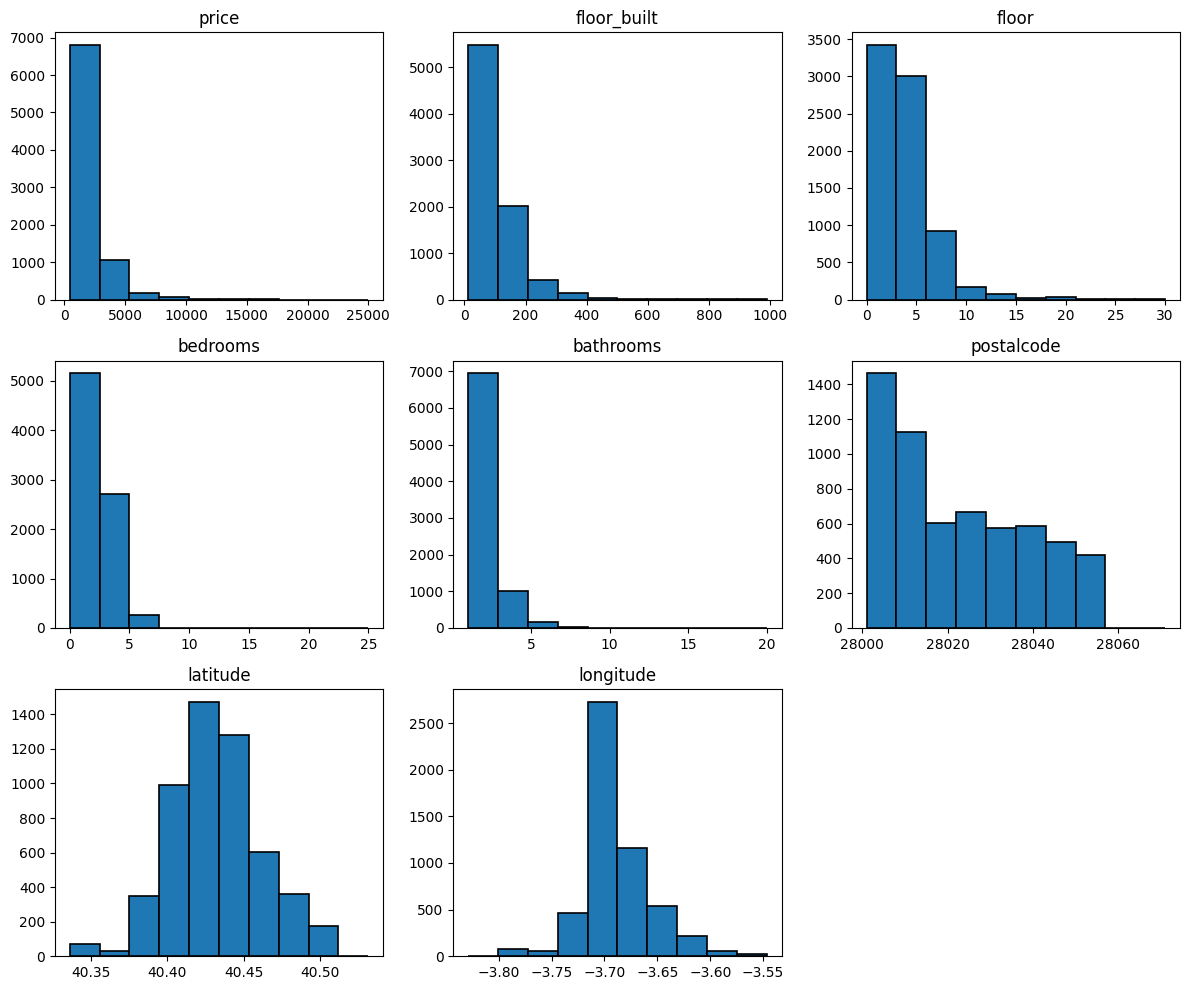

In [25]:
df.hist(bins=10, figsize=(12, 10), grid=False, edgecolor='black', linewidth=1.2)
plt.tight_layout()
plt.show();

Para visualizar los outliers

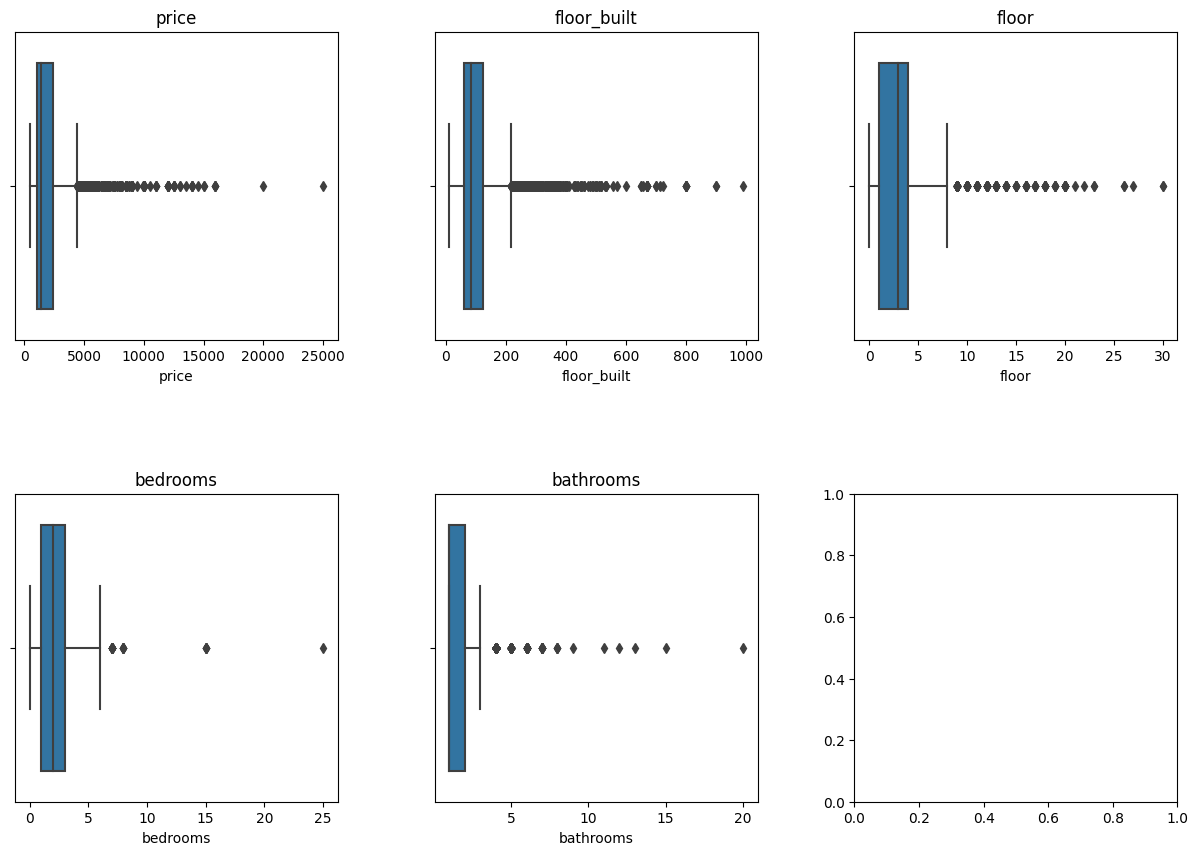

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Iterar a través de cada columna y graficar el boxplot en un subplot
for i, column in enumerate(['price', 'floor_built', 'floor', 'bedrooms', 'bathrooms']):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[column], ax=axs[row, col])
    axs[row, col].set_title(column)

plt.show()

Vemos que hay varios outliers, y tiene pinta de que la mayoría está relacionado con los outliers en el precio. Vamos a ver estos ouliers más de cerca:

In [27]:
df['price'].describe()

count     8139.000000
mean      1963.913749
std       1547.373695
min        450.000000
25%       1050.000000
50%       1450.000000
75%       2400.000000
max      25000.000000
Name: price, dtype: float64

In [28]:
intervalos = [450, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 25000]
pd.cut(df['price'], bins=intervalos).value_counts()

(1000, 1500]     2378
(450, 1000]      1981
(1500, 2000]     1195
(2000, 2500]      815
(2500, 3000]      566
(3000, 3500]      381
(3500, 4000]      281
(6000, 25000]     196
(4000, 4500]      158
(4500, 5000]       91
(5000, 5500]       52
(5500, 6000]       43
Name: price, dtype: int64

El mínimo es de 450€, lo que parece estar dentro de un rango aceptable. El máximo son 25.000€, lo que supone un precio desmesurado para tratarse de un alquiler mensual de un piso normal. Tras un vistazo por la página de Idealista, se puede apreciar que la inmensa mayoría de pisos en alquiler cuyo alquiler es o supera los 5000€, son categorizados como pisos de lujo. Nuestro modelo predictivo se va a focalizar en pisos 'normales', juntar pisos estándar con pisos categorizados como lujosos sería generalizar demasiado el modelo, por lo que vamos a quedarnos con los registros cuyo precio esté comprendido entre 450€ y 5000€ de alquiler. Por si acaso, no renombraremos el df original, si no que crearemos uno nuevo. 

In [29]:
len(df)

8139

In [30]:
df2 = df[df['price'] < 5000]

In [31]:
len(df2)

7819

In [32]:
df2[df2['bathrooms'] > 6]

,type,price,private_owner,floor_built,floor,bedrooms,bathrooms,second_hand,lift,garage_included,...,storeroom,swimming_pool,garden_area,district,subdistrict,postalcode,last_update,Street,latitude,longitude
3784,Semi-detached,4500,False,360,2.0,8,7,True,False,True,...,True,False,False,Moncloa,Aravaca,28023.0,November,Plaza de España,40.423449,-3.710881
6472,Terraced,3350,False,342,NaN,7,7,True,False,True,...,False,False,False,Hortaleza,Palomas,28042.0,November,Calle de las Abelias,40.452467,-3.624762
7093,Penthouse,3350,False,160,6.0,3,20,True,True,False,...,False,False,False,Centro,Chueca-Justicia,28004.0,October,Calle de Argensola,40.426111,-3.694291


20 baños es un dato muy extremo en comparación con el resto de los datos. Vamos a eliminar ese registro. 

In [33]:
df2 = df2[df2['bathrooms'] != 20]

In [34]:
df2.reset_index(drop = True, inplace = True)

Precios de alquileres por **distritos** 

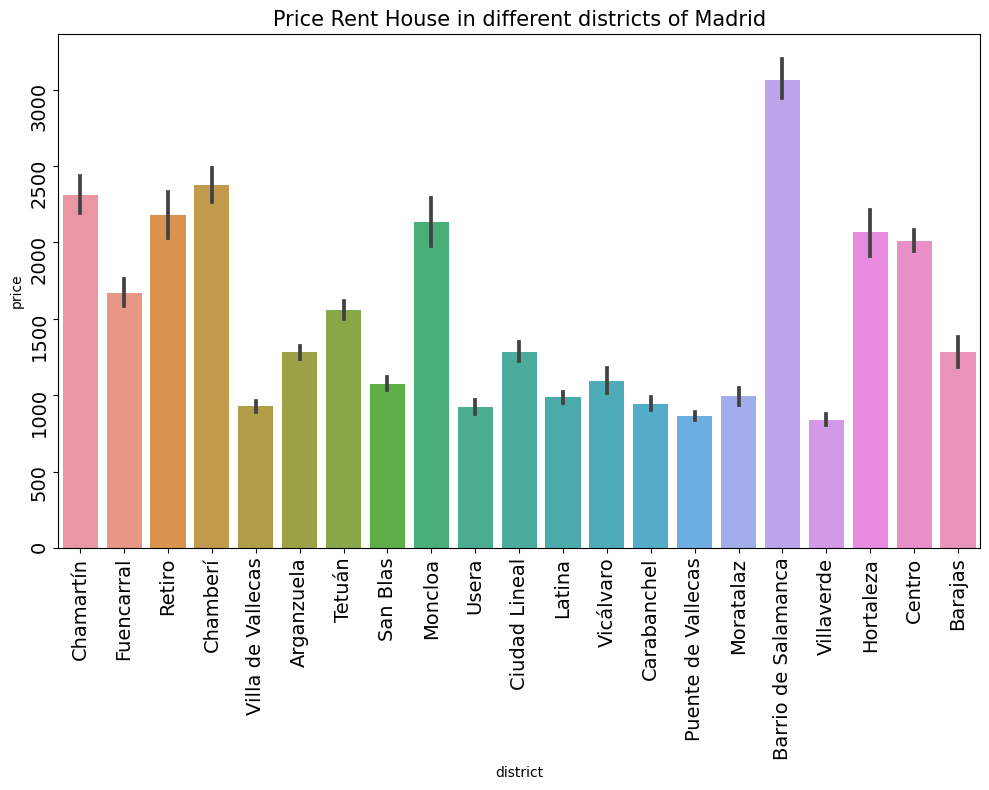

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['district'], y=df['price'])
plt.title('Price Rent House in different districts of Madrid', fontsize= 15)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=90, fontsize=14)
plt.tight_layout()
plt.show()

Precios de alquileres por tipo de **vivienda**

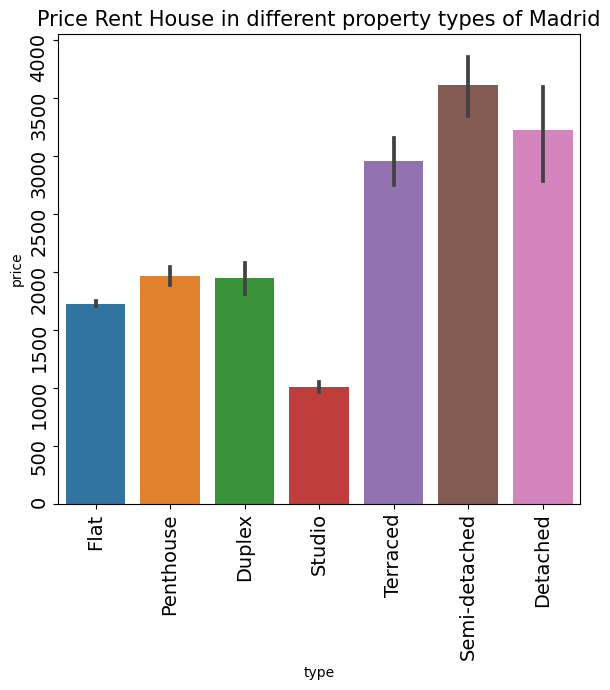

In [36]:
plt.figure(figsize=(6,7))
sns.barplot(x=df2['type'], y=df2['price'])
plt.title('Price Rent House in different property types of Madrid', fontsize= 15)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=90, fontsize=14)
plt.tight_layout()
# plt.savefig("area_rent_price.png", dpi=400)
plt.show()

Relación entre precio de alquiler y **metros cuadrados**

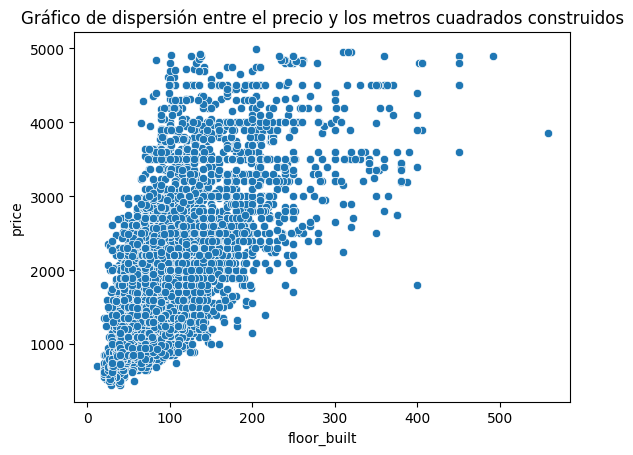

In [37]:
sns.scatterplot(x = df2['floor_built'], y=df2['price'])
plt.title('Gráfico de dispersión entre el precio y los metros cuadrados construidos');

Así queda nuestro registro de outliers tras eliminar los registros anteriores.

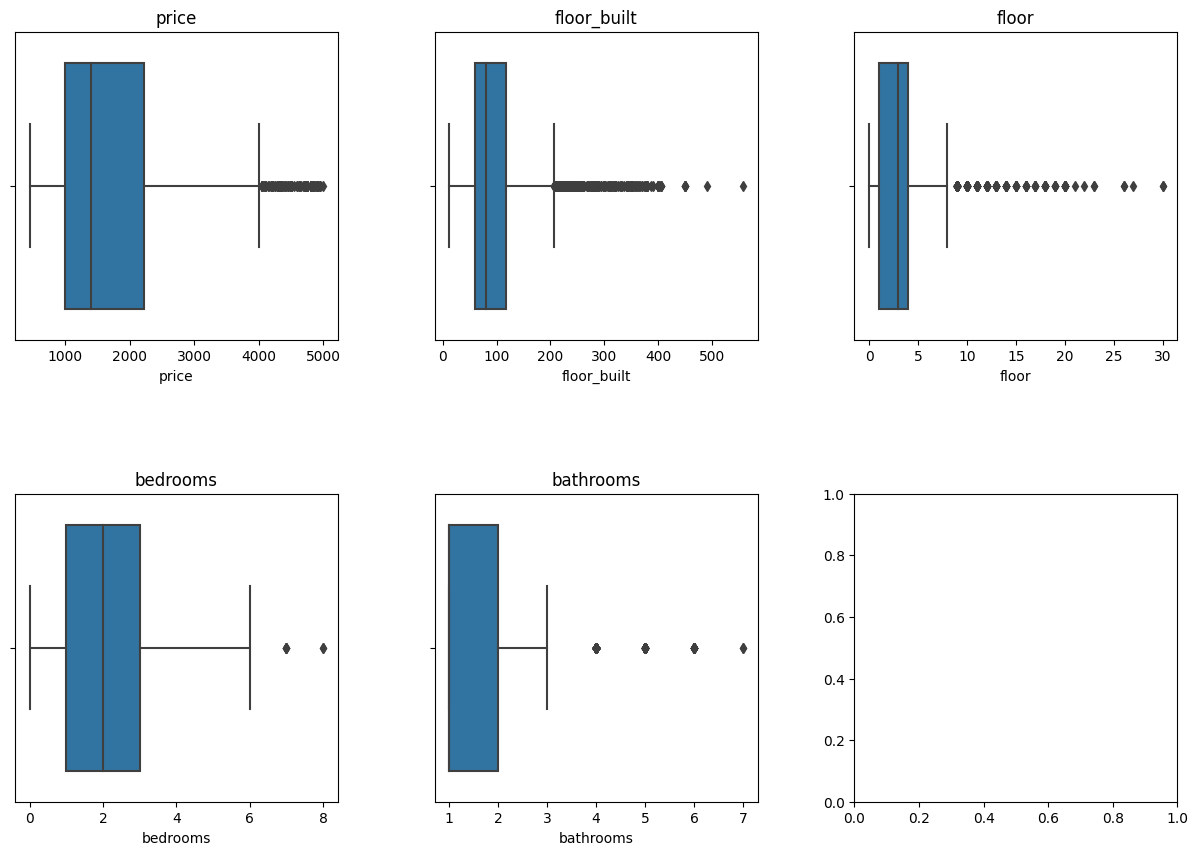

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Iterar a través de cada columna y graficar el boxplot en un subplot
for i, column in enumerate(['price', 'floor_built', 'floor', 'bedrooms', 'bathrooms']):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df2[column], ax=axs[row, col])
    axs[row, col].set_title(column)

plt.show()

In [41]:
df[df['bathrooms'] > 4].sample(20)

,type,price,private_owner,floor_built,floor,bedrooms,bathrooms,second_hand,lift,garage_included,...,storeroom,swimming_pool,garden_area,district,subdistrict,postalcode,last_update,Street,latitude,longitude
3728,Semi-detached,5800,False,600,NaN,6,7,True,False,True,...,True,True,False,Moncloa,Aravaca,28023.0,October,Plaza de España,40.423449,-3.710881
6569,Detached,4500,False,450,NaN,5,6,True,False,True,...,True,True,False,Hortaleza,Conde Orgaz-Piovera,28043.0,November,Colegio Parque Conde de Orgaz,40.450421,-3.645769
279,Flat,6480,False,200,3.0,4,5,True,True,False,...,False,True,False,Chamartín,Bernabéu-Hispanoamérica,28036.0,January,NaN,NaN,NaN
2949,Flat,5500,False,274,2.0,4,5,True,True,True,...,False,False,False,Tetuán,Cuzco-Castillejos,28046.0,September,Cuzco,40.459482,-3.689963
3759,Detached,5000,False,380,NaN,5,5,True,False,False,...,False,True,False,Moncloa,Aravaca,28023.0,October,NaN,NaN,NaN
6531,Detached,7000,False,670,3.0,7,7,True,False,True,...,True,True,False,Hortaleza,Conde Orgaz-Piovera,28043.0,October,Colegio Parque Conde de Orgaz,40.450421,-3.645769
3710,Detached,12000,False,100,NaN,7,9,True,False,True,...,False,True,False,Moncloa,El Plantío,28023.0,October,El Plantío,40.472214,-3.828705
5164,Flat,3300,False,280,0.0,5,5,True,True,True,...,True,False,False,Barrio de Salamanca,Guindalera,28028.0,November,NaN,NaN,NaN
6620,Semi-detached,4900,False,360,4.0,7,5,True,False,True,...,True,True,False,Hortaleza,Conde Orgaz-Piovera,28043.0,November,Colegio Parque Conde de Orgaz,40.450421,-3.645769
5727,Flat,5700,False,261,4.0,4,5,True,True,False,...,False,False,False,Barrio de Salamanca,Castellana,28006.0,October,NaN,NaN,NaN


Se ve que el numero de baños y de habitaciones están bastante relacionados. Aunque sean outliers, también van acompañadas de los metros cuadrados, por lo que los vamos a dejar así.

In [42]:
df2.corr()

,price,private_owner,floor_built,floor,bedrooms,bathrooms,second_hand,lift,garage_included,furnished,...,fitted_wardrobes,air_conditioning,terrace,balcony,storeroom,swimming_pool,garden_area,postalcode,latitude,longitude
price,1.000000,-0.178775,0.694079,0.138915,0.471793,0.666516,0.016916,-0.204258,0.092167,0.041020,...,0.166084,0.268720,0.101106,0.141498,0.067790,-0.005646,NaN,-0.234329,0.156371,-0.092334
private_owner,-0.178775,1.000000,-0.083248,0.007981,-0.059014,-0.085738,0.022590,0.015857,0.048431,0.092914,...,0.097608,-0.012596,0.048077,0.037745,0.054311,0.057321,NaN,0.045989,-0.041215,0.008964
floor_built,0.694079,-0.083248,1.000000,0.134775,0.746048,0.836953,0.021000,-0.412331,0.343688,0.026469,...,0.201047,0.159908,0.254159,0.106671,0.264447,0.202807,NaN,0.109429,0.257914,0.043864
floor,0.138915,0.007981,0.134775,1.000000,0.107860,0.089507,-0.068006,0.008777,0.094552,0.022493,...,0.146329,0.101400,0.173341,-0.006727,0.022833,0.109969,NaN,0.043769,0.129331,0.023726
bedrooms,0.471793,-0.059014,0.746048,0.107860,1.000000,0.690631,0.024481,-0.273064,0.263583,-0.003307,...,0.124500,-0.009814,0.246698,0.080133,0.184080,0.143890,NaN,0.149781,0.155801,0.072523
bathrooms,0.666516,-0.085738,0.836953,0.089507,0.690631,1.000000,0.018997,-0.349476,0.355271,0.038145,...,0.211681,0.200244,0.193880,0.081137,0.262194,0.217851,NaN,0.089737,0.257210,0.027857
second_hand,0.016916,0.022590,0.021000,-0.068006,0.024481,0.018997,1.000000,-0.006973,-0.054757,0.085080,...,0.014117,0.013415,-0.011234,0.022277,-0.101090,-0.096207,NaN,-0.077049,-0.090997,-0.006226
lift,-0.204258,0.015857,-0.412331,0.008777,-0.273064,-0.349476,-0.006973,1.000000,-0.128601,0.014993,...,-0.029559,-0.027129,-0.164477,-0.042135,-0.169913,-0.091219,NaN,-0.100238,-0.101153,-0.062804
garage_included,0.092167,0.048431,0.343688,0.094552,0.263583,0.355271,-0.054757,-0.128601,1.000000,0.019746,...,0.240875,0.134295,0.142663,-0.034862,0.471302,0.565643,NaN,0.423365,0.316395,0.181333
furnished,0.041020,0.092914,0.026469,0.022493,-0.003307,0.038145,0.085080,0.014993,0.019746,1.000000,...,0.099792,0.085988,0.011171,0.053441,0.029654,0.021600,NaN,-0.048023,0.054843,0.010798


## COLUMNAS TIPO BOOLEANO:

In [43]:
bool_cols = df2.select_dtypes('bool').columns.tolist()
bool_cols

['private_owner',
 'second_hand',
 'lift',
 'garage_included',
 'furnished',
 'equipped_kitchen',
 'fitted_wardrobes',
 'air_conditioning',
 'terrace',
 'balcony',
 'storeroom',
 'swimming_pool',
 'garden_area']

In [44]:
for i in bool_cols:
    print(df2[i].value_counts())

False    6464
True     1354
Name: private_owner, dtype: int64
True     7799
False      19
Name: second_hand, dtype: int64
True     7665
False     153
Name: lift, dtype: int64
False    5571
True     2247
Name: garage_included, dtype: int64
True     7435
False     383
Name: furnished, dtype: int64
True     7435
False     383
Name: equipped_kitchen, dtype: int64
True     5542
False    2276
Name: fitted_wardrobes, dtype: int64
True     5497
False    2321
Name: air_conditioning, dtype: int64
False    5353
True     2465
Name: terrace, dtype: int64
False    6495
True     1323
Name: balcony, dtype: int64
False    6313
True     1505
Name: storeroom, dtype: int64
False    6189
True     1629
Name: swimming_pool, dtype: int64
False    7818
Name: garden_area, dtype: int64


La columna garden area es constante, todos sus valores son False. No nos va a portar ninguna información, la borramos.

In [45]:
df2.drop(columns = ['garden_area'], inplace = True)

Vamos a pasar las columnas booleanas a numericas: en vez de True y False, tendremos 1 y 0

In [46]:
bool_cols = df2.select_dtypes('bool').columns.tolist()
bool_cols
df2[bool_cols] = df2[bool_cols].astype(int)


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7818 entries, 0 to 7817
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              7818 non-null   object 
 1   price             7818 non-null   int64  
 2   private_owner     7818 non-null   int32  
 3   floor_built       7818 non-null   int64  
 4   floor             7397 non-null   float64
 5   bedrooms          7818 non-null   int64  
 6   bathrooms         7818 non-null   int64  
 7   second_hand       7818 non-null   int32  
 8   lift              7818 non-null   int32  
 9   garage_included   7818 non-null   int32  
 10  furnished         7818 non-null   int32  
 11  equipped_kitchen  7818 non-null   int32  
 12  fitted_wardrobes  7818 non-null   int32  
 13  air_conditioning  7818 non-null   int32  
 14  terrace           7818 non-null   int32  
 15  balcony           7818 non-null   int32  
 16  storeroom         7818 non-null   int32  


In [48]:
df2.to_csv('../Data/Alquileres_Madrid.csv')